# RNN for Predict Google Stock Price

## Data Preprocessing

### Importing the libraries

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

In [0]:
training_set = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = training_set.iloc[:,1:2].values

### Feature Scaling

In [0]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)


### Getting the inputs and the outputs

In [0]:
X_train = training_set[0:1257]
y_train = training_set[1:1258]


### Reshaping

In [0]:
X_train = np.reshape(X_train, (1257, 1, 1))

## Building the RNN

### Importing the Keras libraries and packages

In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

Using TensorFlow backend.


### Initialising the RNN

In [0]:
regressor = Sequential()

### Adding the input layer and the LSTM layer

In [0]:
regressor.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None, 1)))

### Adding the output layer

In [0]:
regressor.add(Dense(units = 1))

### Compiling the RNN

In [0]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Fitting the RNN to the Training set

In [12]:
regressor.fit(X_train, y_train, batch_size = 32, epochs = 200)

Epoch 1/200
1257/1257 [==============================] - 1s 431us/step - loss: 0.8551
Epoch 2/200
1257/1257 [==============================] - 0s 70us/step - loss: 0.6965
Epoch 3/200
1257/1257 [==============================] - 0s 68us/step - loss: 0.5649
Epoch 4/200
1257/1257 [==============================] - 0s 71us/step - loss: 0.4557
Epoch 5/200
1257/1257 [==============================] - 0s 72us/step - loss: 0.3661
Epoch 6/200
1257/1257 [==============================] - 0s 71us/step - loss: 0.2930
Epoch 7/200
1257/1257 [==============================] - 0s 72us/step - loss: 0.2338
Epoch 8/200
1257/1257 [==============================] - 0s 70us/step - loss: 0.1867
Epoch 9/200
1257/1257 [==============================] - 0s 67us/step - loss: 0.1499
Epoch 10/200
1257/1257 [==============================] - 0s 69us/step - loss: 0.1220
Epoch 11/200
1257/1257 [==============================] - 0s 70us/step - loss: 0.1011
Epoch 12/200
1257/1257 [==============================] - 0s 7

## Making the predictions and visualising the results

### Getting the real stock price of 2017

In [0]:
test_set = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = test_set.iloc[:,1:2].values

### Getting the predicted stock price of 2017

In [0]:
inputs = real_stock_price
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (20, 1, 1))
predicted_stock_price = regressor.predict(inputs)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

### Visualising the results

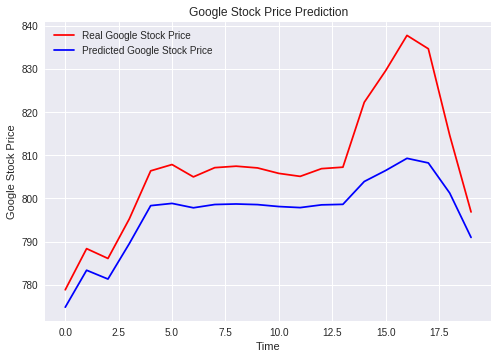

In [17]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()